In [10]:
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy_stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import math

In [2]:
data = pd.read_excel('Cars.xlsx')

In [3]:
data.shape

(32, 12)

In [4]:
#Dropping Model Column

data=data.drop('model',axis=1)
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
#Building Customer Summary Function

def custom_summary(data):
    
    result=[]
    
    for col in list(data.columns):
        stats = OrderedDict({'feature name':col,'count':data[col].count(),
                             'data types':data[col].dtype,
                             'min':round(data[col].min(),2),
                             'Q1':round(data[col].quantile(0.25),2),
                             'mean':round(data[col].mean(),2),
                             'median':round(data[col].median(),2),
                             'Q3':round(data[col].quantile(0.75),2),
                             'max':round(data[col].max(),2),                   
                             'Variance':round(data[col].var(),2),
                             'SD':round(data[col].std(),2),
                             'Skew':round(data[col].skew(),2),
                             'Kurt':round(data[col].kurt(),2)})
                             
        result.append(stats)
        if data[col].skew() < -1:
            SK_Label = 'Highly Negative Skewed'
        elif -1 <= data[col].skew() <-0.50:
            SK_Label = 'Moderately Negatively Skewed'
        elif -0.50 <= data[col].skew() <0:
            SK_Label = 'Fairly Symmetric (Negative)'
        elif 0 <= data[col].skew() <0.50:
            SK_Label = 'Fairly Symmetric (Positive)'
        elif 0.50 <= data[col].skew() <1:
            SK_Label = 'Moderately Positively Skewed'
        elif data[col].skew() >1:
            SK_Label = 'Highly Positively Skewed'
        else : 
            SK_Label = 'Error'
        stats['Skewness Comment'] = SK_Label
            
        
    resultdf = pd.DataFrame(result)
    return resultdf

In [6]:
custom_summary(data)

,feature name,count,data types,min,Q1,mean,median,Q3,max,Variance,SD,Skew,Kurt,Skewness Comment
0,mpg,32,float64,10.40,15.42,20.09,19.20,22.80,33.90,36.32,6.03,0.67,-0.02,Moderately Positively Skewed
1,cyl,32,int64,4.00,4.00,6.19,6.00,8.00,8.00,3.19,1.79,-0.19,-1.76,Fairly Symmetric (Negative)
2,disp,32,float64,71.10,120.82,230.72,196.30,326.00,472.00,15360.80,123.94,0.42,-1.07,Fairly Symmetric (Positive)
3,hp,32,int64,52.00,96.50,146.69,123.00,180.00,335.00,4700.87,68.56,0.80,0.28,Moderately Positively Skewed
4,drat,32,float64,2.76,3.08,3.60,3.70,3.92,4.93,0.29,0.53,0.29,-0.45,Fairly Symmetric (Positive)
5,wt,32,float64,1.51,2.58,3.22,3.33,3.61,5.42,0.96,0.98,0.47,0.42,Fairly Symmetric (Positive)
6,qsec,32,float64,14.50,16.89,17.85,17.71,18.90,22.90,3.19,1.79,0.41,0.86,Fairly Symmetric (Positive)
7,vs,32,int64,0.00,0.00,0.44,0.00,1.00,1.00,0.25,0.50,0.26,-2.06,Fairly Symmetric (Positive)
8,am,32,int64,0.00,0.00,0.41,0.00,1.00,1.00,0.25,0.50,0.40,-1.97,Fairly Symmetric (Positive)
9,gear,32,int64,3.00,3.00,3.69,4.00,4.00,5.00,0.54,0.74,0.58,-0.90,Moderately Positively Skewed


In [7]:
# Building Model Visualization

def outlier_detection_plots(data,col):
    F,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(17,8))
    #col='mpg'

    sns.boxplot(data[col],ax=ax1,orient='v',color='Green')
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('box density')
    ax1.set_ylabel(col + ' Values')

    #Plotting Histogram

    sns.distplot(data[col],ax=ax2,color='Green',fit=scipy_stats.norm)
    ax2.set_title(col + ' Histogram with Outliers')
    ax2.set_xlabel(col + ' Values')
    ax2.set_ylabel('density')
    ax2.axvline(data[col].mean(),linestyle='dashed')
    ax2.axvline(data[col].median(),color='Black')

    #plotting Histogram without Outliers

    upperbound,lowerbound = np.percentile(data[col],[5,95])
    y=pd.DataFrame(np.clip(data[col],upperbound,lowerbound)) #Clip function - filters out values less than 5% and greater than 95%

    sns.distplot(y[col],ax=ax3,color='Green',fit=scipy_stats.norm)
    ax3.set_title(col + ' Histogram without Outliers')
    ax3.set_xlabel(col + ' Values')
    ax3.set_ylabel('density')
    ax3.axvline(y[col].mean(),linestyle='dashed')
    ax3.axvline(y[col].median(),color='Black')
    plt.show()


D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

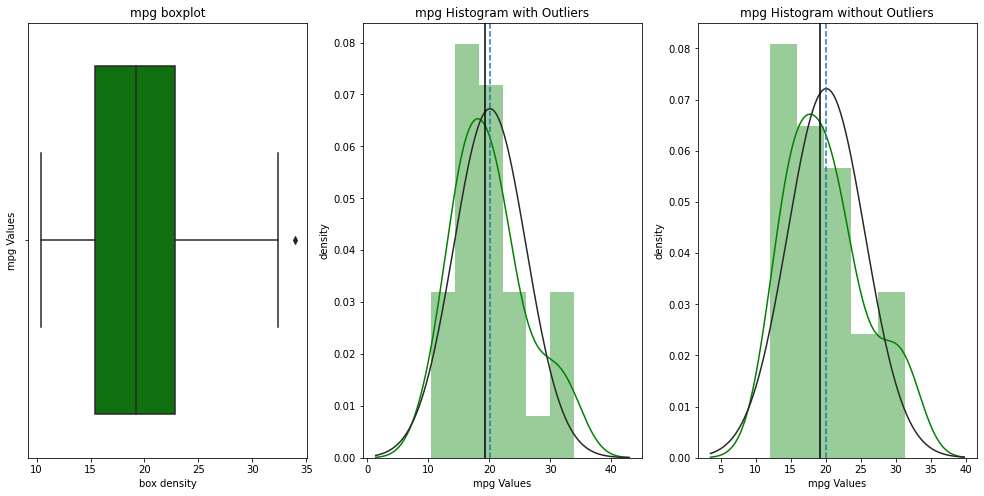

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

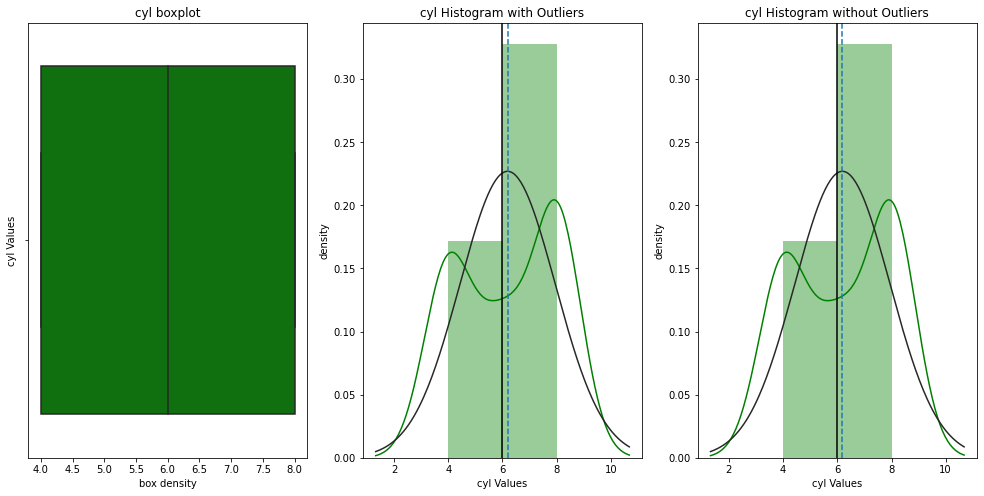

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

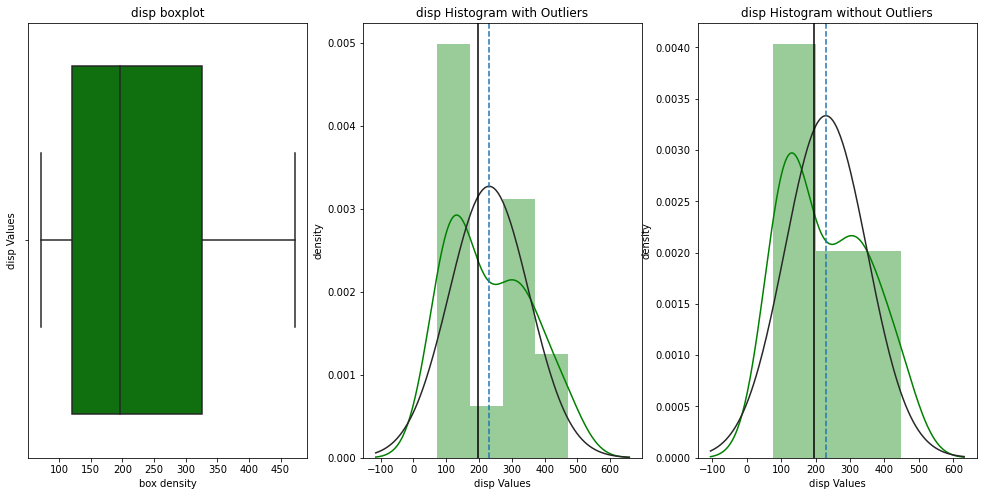

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

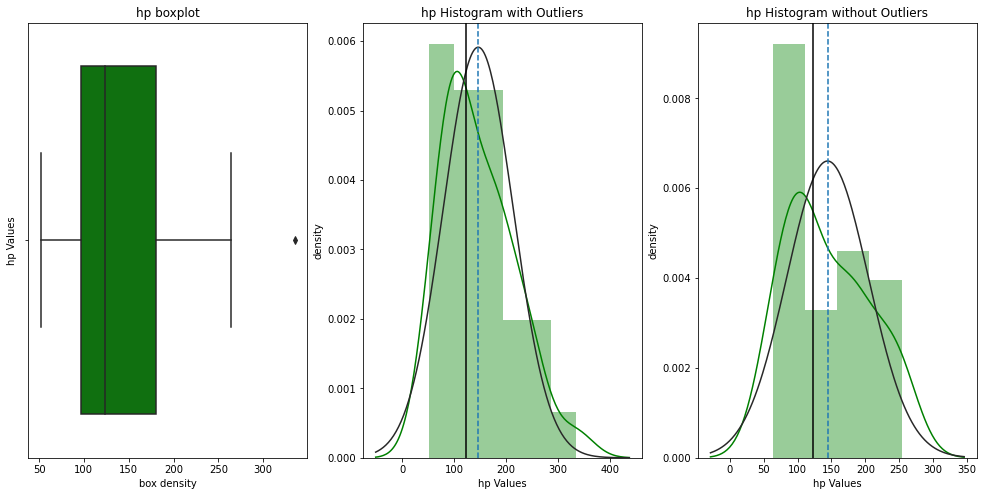

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

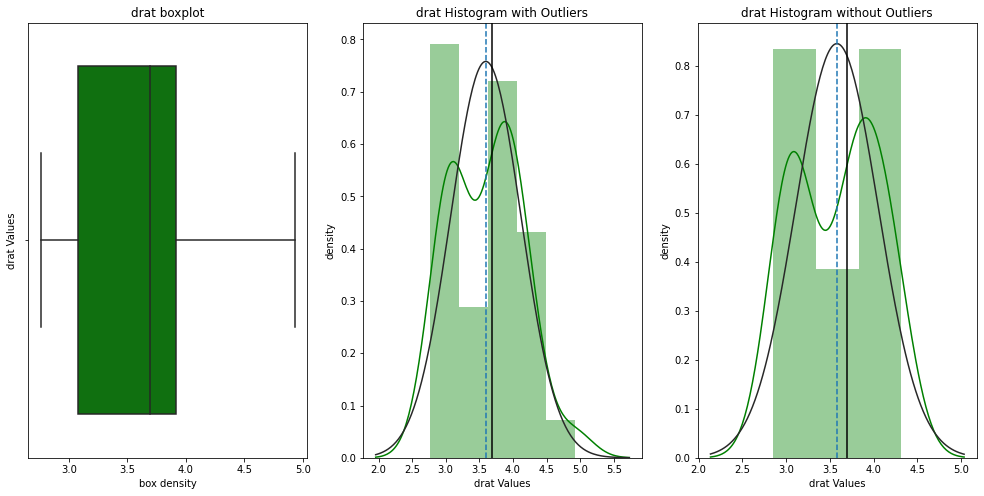

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

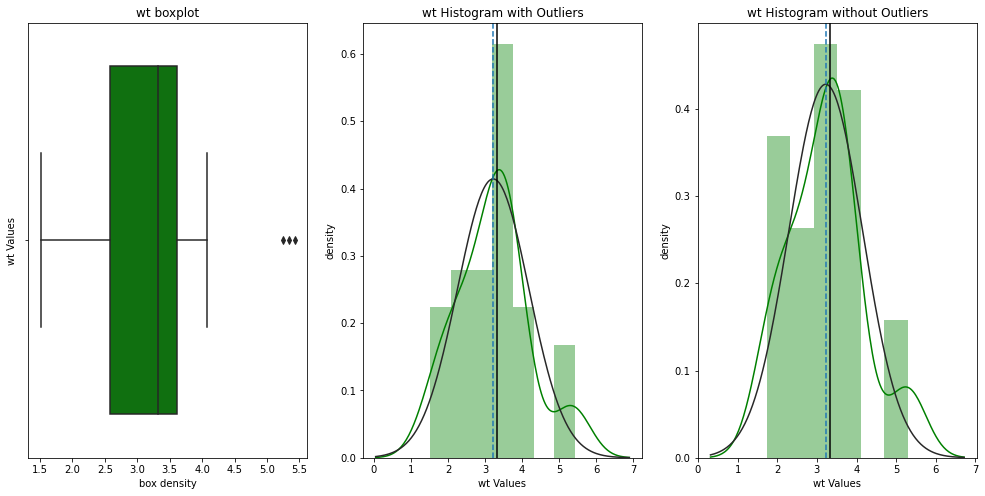

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

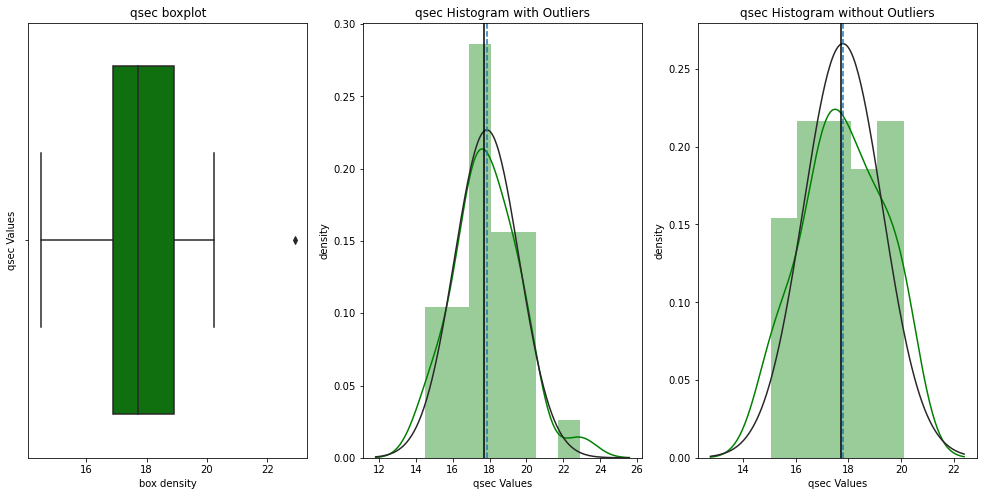

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

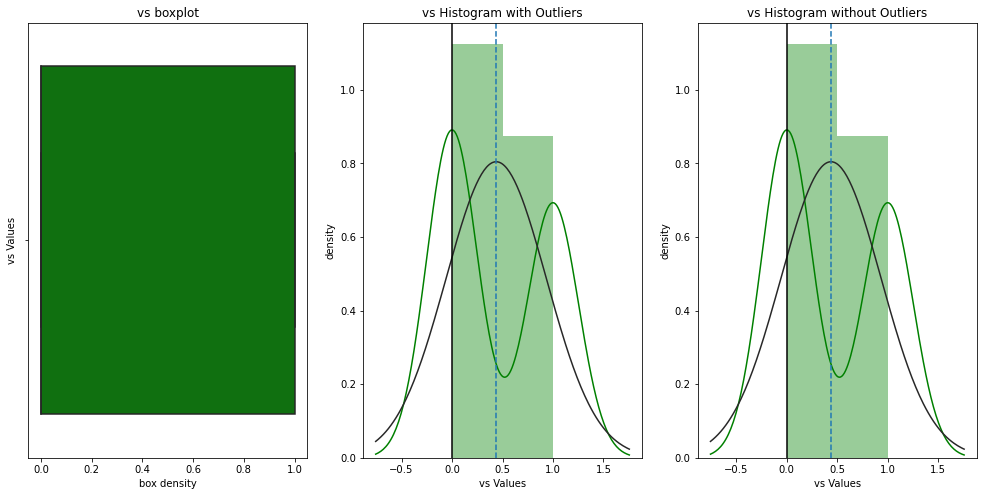

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

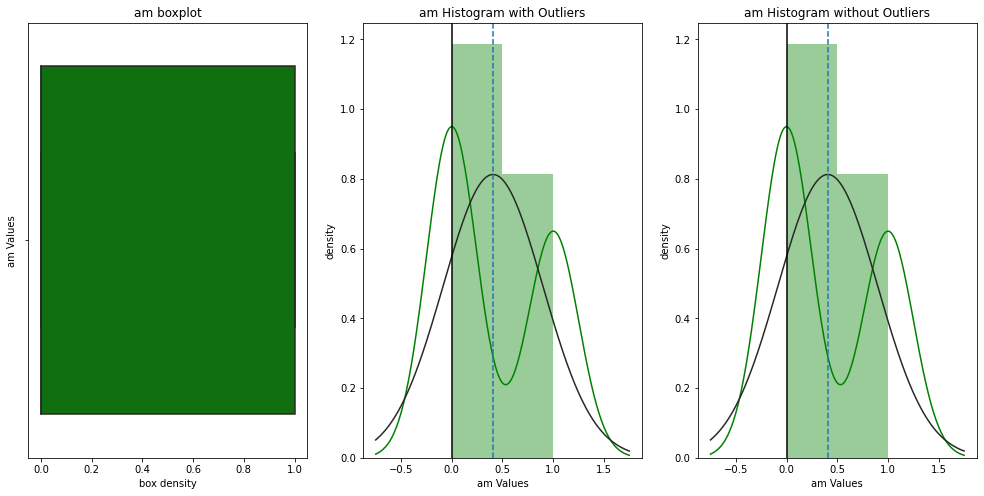

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

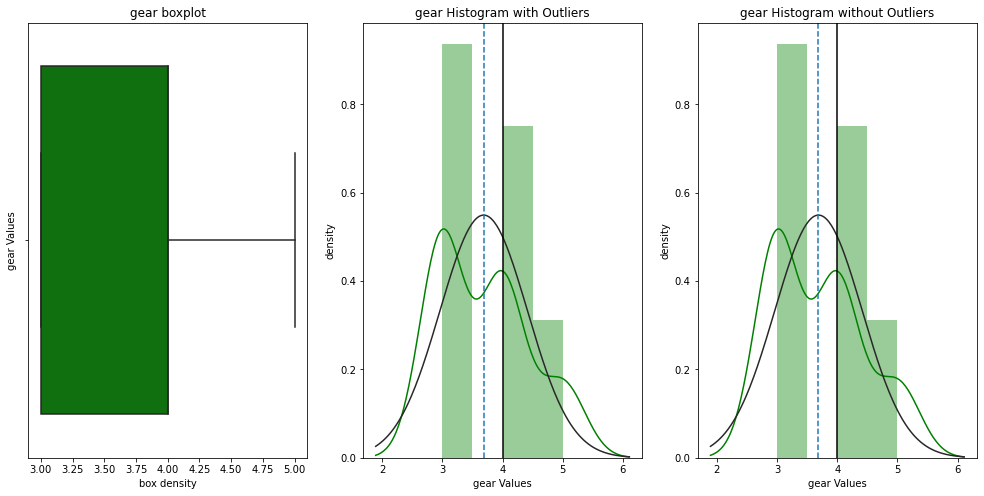

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remo

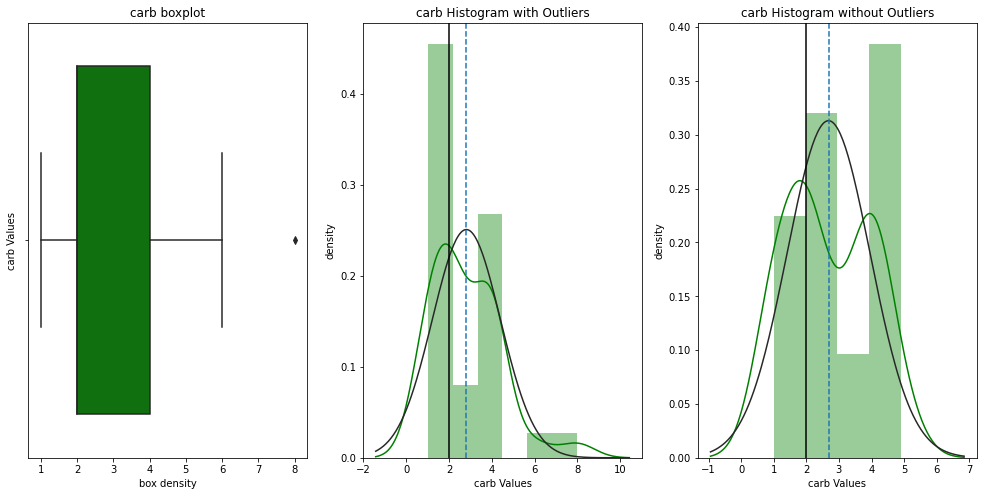

In [8]:
for col in list (data.columns):
    outlier_detection_plots(data,col)

In [13]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [76]:
x=data.iloc[:,1:10]
x.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear
0,6,160.0,110,3.90,2.620,16.46,0,1,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4
3,6,258.0,110,3.08,3.215,19.44,1,0,3
4,8,360.0,175,3.15,3.440,17.02,0,0,3


In [77]:
y=data['mpg']
y=pd.DataFrame(y)
y.head()

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


In [78]:
data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [79]:
lr=LinearRegression()

In [80]:
lr.fit(x,y)

LinearRegression()

In [81]:
new_y=lr.predict(x)

In [82]:
print('R Square for the model is:',r2_score(y,new_y))

R Square for the model is: 0.8686546173105074


In [83]:
MSE=mean_squared_error(y,new_y)

In [84]:
RMSE=math.sqrt(MSE)

In [85]:
avg_y=y.mean()

In [86]:
RMSE_percent=RMSE/avg_y

In [87]:
RMSE_percent

mpg    0.107008
dtype: float64